In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
# Statistics
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [7]:
df_data = pd.read_csv("data/cleaned_data.csv")
df_data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,TSH measured,psych,hypopituitary,tumor,goitre,...,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,Class_compensated_hypothyroid,Class_negative,Class_primary_hypothyroid,Class_secondary_hypothyroid
0,41.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,109.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,23.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,110.272981,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,46.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,120.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,70.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,110.272981,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,70.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,70.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3617,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,110.272981,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3618,68.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3619,74.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,105.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3620,72.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,87.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [8]:
df_data['hypothyroid'] = df_data[['Class_compensated_hypothyroid', 'Class_negative',
                      'Class_primary_hypothyroid', 'Class_secondary_hypothyroid']].apply(lambda x: 0 if x['Class_negative'] == 1 else 1, axis=1)
df_data = df_data.drop(labels=['Class_compensated_hypothyroid', 'Class_negative',
                      'Class_primary_hypothyroid', 'Class_secondary_hypothyroid'], axis=1)
df_data.to_csv("data/final_data.csv", index=False)

In [23]:
df_final = pd.read_csv("data/final_data.csv")
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3622 entries, 0 to 3621
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3622 non-null   float64
 1   sex                        3622 non-null   float64
 2   on thyroxine               3622 non-null   float64
 3   query on thyroxine         3622 non-null   float64
 4   on antithyroid medication  3622 non-null   float64
 5   TSH measured               3622 non-null   float64
 6   psych                      3622 non-null   float64
 7   hypopituitary              3622 non-null   float64
 8   tumor                      3622 non-null   float64
 9   goitre                     3622 non-null   float64
 10  lithium                    3622 non-null   float64
 11  query hyperthyroid         3622 non-null   float64
 12  query hypothyroid          3622 non-null   float64
 13  I131 treatment             3622 non-null   float

In [26]:
def stat_analysis(df, n):
    #-----------------------------------------------------------------------------------------
    # Check correlation
    corr = df.corr()

    # Set up the matplotlib plot configuration
    plt.figure(figsize=(40,38))

    plt.subplot(2,1,1)

    # Generate a mask for upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Configure a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap
    plt.title('Correlation')
    sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


    #-----------------------------------------------------------------------------------------
    # Perform PCA to make dimensionality reduction
    pca = PCA()

    # Fit the standardized data to the pca
    pca=pca.fit(df)

    # Plot the proportion of variance explained on the y-axis of the bar plot
    # Set up the matplotlib plot configuration
    plt.subplot(2,1,2)
    plt.title('PCA')
    plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
    plt.xlabel('Principal component #')
    plt.ylabel('Proportion of variance explained')
    plt.xticks(range(df.shape[1]))

    two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[n]
    print("The cumulative variance of the first several principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

In [22]:
def mutual_info_relative_to(class_name):
    # Select best features
    X_train_feat, _, y_train_feat ,_ = train_test_split(df_final.drop(labels=[class_name], axis=1),
        df_final[class_name],
        test_size=0.3,
        random_state=0)

    mutual_info = mutual_info_classif(X_train_feat, y_train_feat)
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = X_train_feat.columns
    mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
    plt.title(f"Mutual Information Related to: {class_name}")
    plt.show()

In [70]:
# Define the logistic regression function for plotting the decision boundary
def plot_logistic_regression_decision_boundary(feats, x_test, lr):
    # Create a meshgrid of the two selected features
    if len(feats)==2:
        xmin, xmax = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
        ymin, ymax = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.1),
                             np.arange(ymin, ymax, 0.1))

        # Predict the classes for all the points in the meshgrid
        Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary with the data points
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=20, edgecolor='b')
        plt.xlabel(feats[0])
        plt.ylabel(feats[1])
        plt.title("Logistic Regression Decision Boundary")
        plt.show()
    else:
        return 0

The cumulative variance of the first several principal components is 0.99626


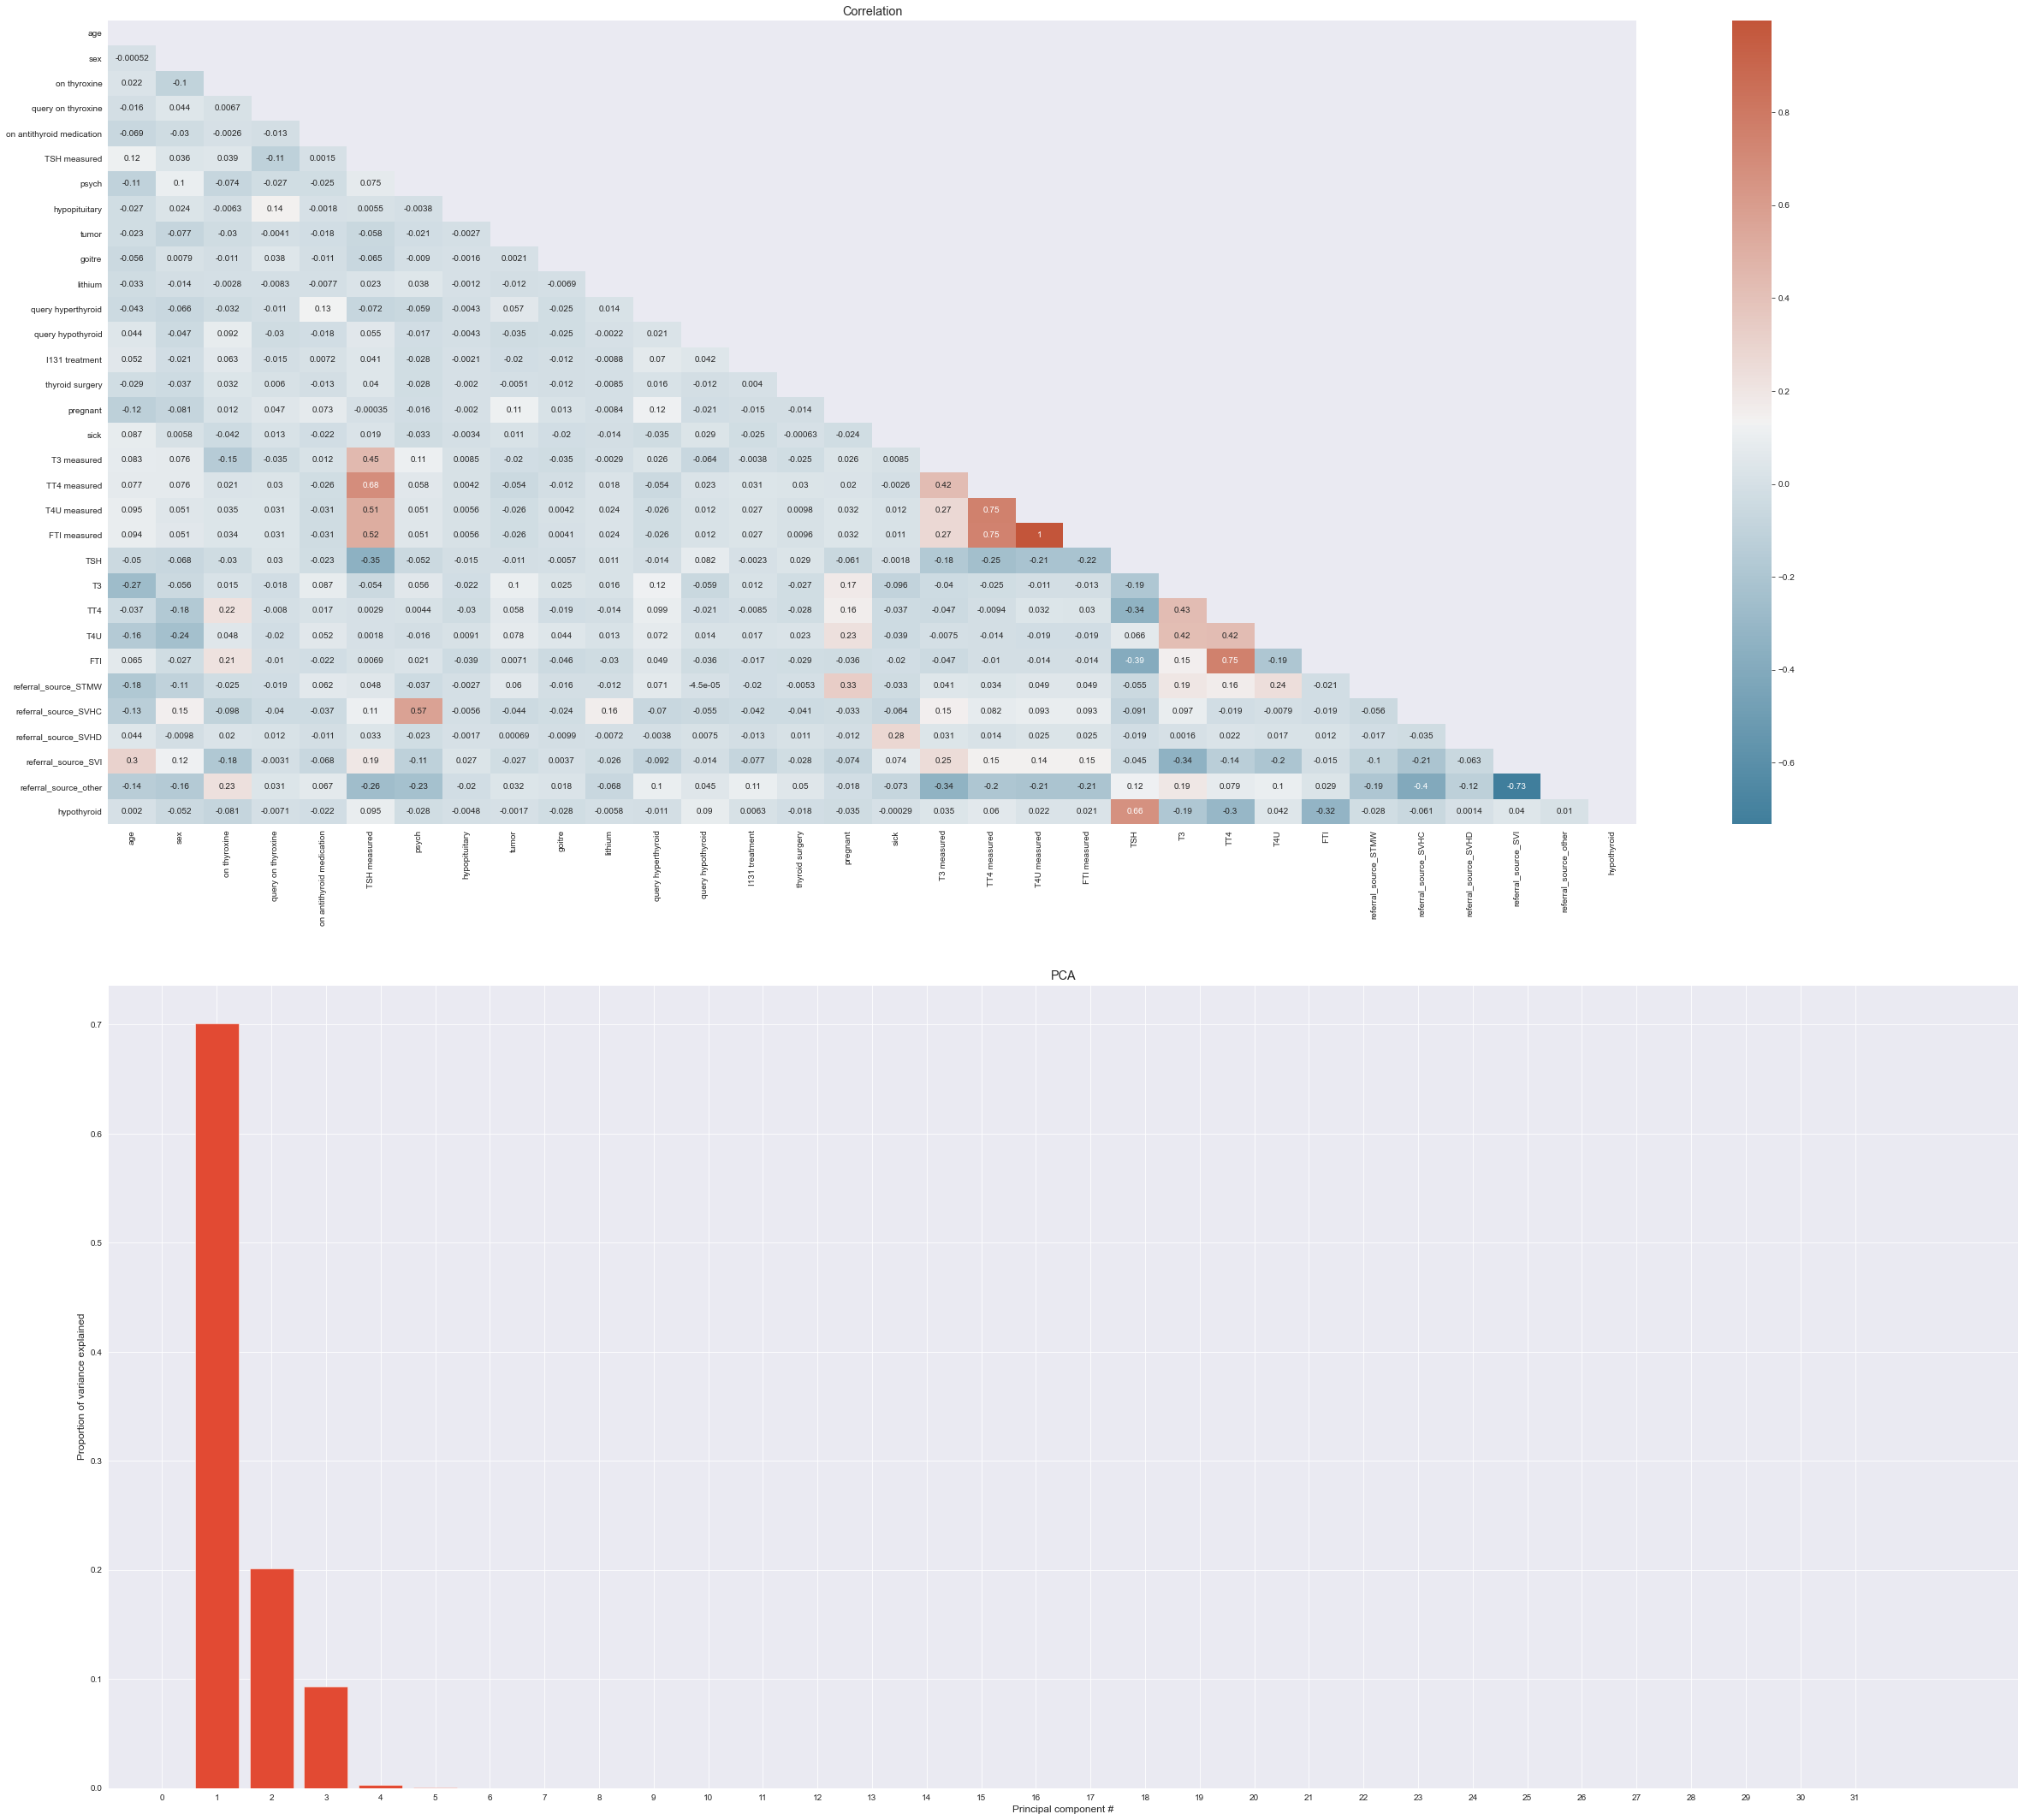

In [66]:
stat_analysis(df_final, 2)

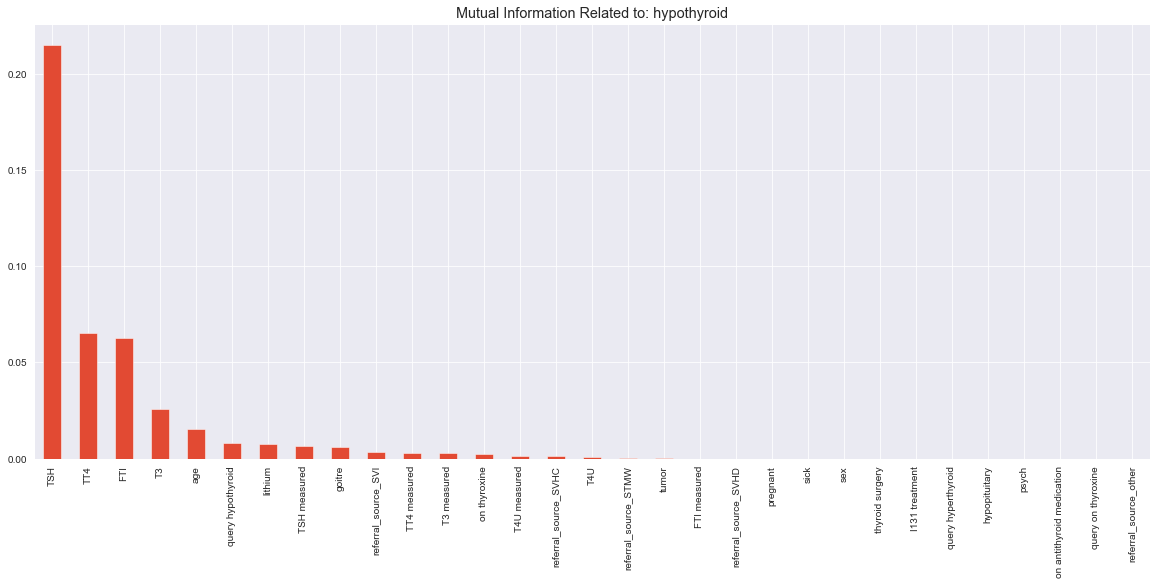

In [67]:
mutual_info_relative_to("hypothyroid")

In [68]:
x_train, x_test, y_train, y_test = train_test_split(df_final.drop(labels=['hypothyroid'], axis=1),
        df_final["hypothyroid"],
        test_size=0.3,
        random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict on the test set and evaluate model performance
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, lr.predict(x_test))
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred)
score = cross_val_score(lr, df_final.drop(labels=['hypothyroid'], axis=1), df_final["hypothyroid"], cv=KFold(n_splits=15))
print(f'Model Accuracy = {accuracy}\n F1-score = {f1}\n Confusion Matrix = {cm} \n\n Classification Report:\n {classification} \n Avg Cross Validation Score = {score.mean()}')

Model Accuracy = 0.9898804047838087
 F1-score = 0.9897450880335242
 Confusion Matrix = [[996   3]
 [  8  80]] 

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       999
           1       0.96      0.91      0.94        88

    accuracy                           0.99      1087
   macro avg       0.98      0.95      0.97      1087
weighted avg       0.99      0.99      0.99      1087
 
 Avg Cross Validation Score = 0.9867494256026885


Model Accuracy = 0.9733210671573137
 F1-score = 0.9732515147046514
 Confusion Matrix = [[985  14]
 [ 15  73]] 

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       999
           1       0.84      0.83      0.83        88

    accuracy                           0.97      1087
   macro avg       0.91      0.91      0.91      1087
weighted avg       0.97      0.97      0.97      1087
 
 Avg Cross Validation Score = 0.9710149400454946


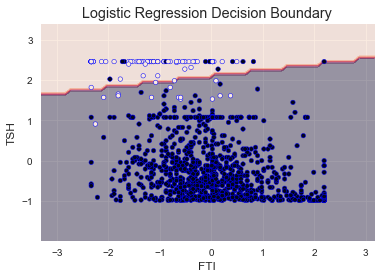

In [71]:
selected_feats = ["FTI", "TSH"]


x_train, x_test, y_train, y_test = train_test_split(df_final[selected_feats],
        df_final["hypothyroid"],
        test_size=0.3,
        random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

lr = LogisticRegression()
lr.fit(x_train, y_train)

# Predict on the test set and evaluate model performance
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, lr.predict(x_test))
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred)
score = cross_val_score(lr, df_final[selected_feats], df_final["hypothyroid"], cv=KFold(n_splits=15))
print(f'Model Accuracy = {accuracy}\n F1-score = {f1}\n Confusion Matrix = {cm} \n\n Classification Report:\n {classification} \n Avg Cross Validation Score = {score.mean()}')

# Plot the data points and decision boundary
plot_logistic_regression_decision_boundary(selected_feats, x_test, lr)

Model Accuracy = 0.920883164673413
 F1-score = 0.8908841924015619
 Confusion Matrix = [[995   4]
 [ 82   6]] 
 Classification Report = 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       999
           1       0.60      0.07      0.12        88

    accuracy                           0.92      1087
   macro avg       0.76      0.53      0.54      1087
weighted avg       0.90      0.92      0.89      1087
 
 Avg Cross Validation Score = 0.9867494256026885


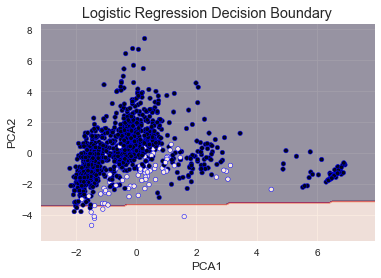

In [74]:
x_train, x_test, y_train, y_test = train_test_split(df_final.drop(labels=['hypothyroid'], axis=1),
        df_final["hypothyroid"],
        test_size=0.3,
        random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Apply PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train logistic regression model on the transformed data
lr = LogisticRegression()
lr.fit(x_train_pca, y_train)

# Predict on the test set and evaluate model performance
y_pred = lr.predict(x_test_pca)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, lr.predict(x_test_pca))
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred)
score = cross_val_score(lr, df_final.drop(labels=['hypothyroid'], axis=1), df_final["hypothyroid"], cv=KFold(n_splits=15))
print(f'Model Accuracy = {accuracy}\n F1-score = {f1}\n Confusion Matrix = {cm} \n Classification Report = \n{classification} \n Avg Cross Validation Score = {score.mean()}')

# Plot the data points and decision boundary
plot_logistic_regression_decision_boundary(["PCA1", "PCA2"], x_test_pca, lr)

We notice that from our 3 scenarios:
- Best Scenario, Can not be plotted => train the Logistic Regression Model with all the features.
- Acceptable Scenario, Can be plotted => train with the best 2 features using the Mutual Information Algorithm.
- Worst Scenario, Can be plotted => train with the PCA features map to the worst metrics as the distribution of the data is *Non-Linear*.